# Análise Espacial para o Rolê Perfeito por Johann Kotaro

## Importar Bibliotecas

In [1]:
import pandas as pd
from geopy.distance import great_circle
import matplotlib.pyplot as plt
import folium

## Carregar os Dados

In [2]:
# Carregar a base de dados
file_path = "Base dados.xlsx"
dados = pd.read_excel(file_path)

# Corrigir os valores e formatação de latitude e longitude, caso seja necessário
dados['Latitude'] = dados['Latitude'].astype(str).str.replace(',', '.').astype(float)
dados['Longitude'] = dados['Longitude'].astype(str).str.replace(',', '.').astype(float)

# Verificar os dados
print(dados)


         Nome                    Bairro  Latitude  Longitude  Peso
0        João               Cidade Nova -3.029929 -59.992594     3
1      Israel                  Compensa -3.105208 -60.053693     3
2         Ivo                  Compensa -3.105208 -60.053693     3
3   Alexandre         São José Operário -3.066507 -59.945799     3
4      Johann  Nossa Senhora das Graças -3.104233 -60.020028     3
5        Alex    Parque Dez de Novembro -3.079901 -60.013207     1
6     Matheus    Parque Dez de Novembro -3.079901 -60.013207     2
7       Maria                Petrópolis -3.111890 -59.994795     2
8     Cassius             Santo Antônio -3.115829 -60.044077     1
9    Elissama             São Francisco -3.111394 -60.003455     3
10     Marcos               São Geraldo -3.111057 -60.025517     3
11       Caio         São José Operário -3.066507 -59.945799     1
12   Fernanda         São José Operário -3.066507 -59.945799     3


## Calcular o Centro Ideal

In [3]:
# Função para calcular o Centro Ideal usando médias ponderadas
def calcular_centro_ponderado(dados):
    
    # Soma do Peso Total
    peso_total = dados['Peso'].sum()
    
    # Cálculo das coordenadas ponderadas
    latitude_ponderada = (dados['Latitude'] * dados['Peso']).sum() / peso_total
    longitude_ponderada = (dados['Longitude'] * dados['Peso']).sum() / peso_total
    
    return latitude_ponderada, longitude_ponderada

# Centro Ideal é calcular_centro_ponderado
centro_ideal = calcular_centro_ponderado(dados)

# Visualizar o valor do centro ideal para o rolê 
print(f"O centro ideal para o rolê é: {centro_ideal}")

O centro ideal para o rolê é: (-3.088578816129032, -60.00454276129033)


## Calcular Distâncias ao Centro Ideal

In [4]:
# Calculando as distâncias até o centro ideal
dados['Distancia do Centro'] = dados.apply(lambda row: great_circle((row['Latitude'], row['Longitude']), centro_ideal).kilometers, axis=1)

# Mostra as distâncias de cada amigo do centro ideal classificando a coluna "Distancia do Centro" do maior para o menor
print(dados.sort_values(by='Distancia do Centro', ascending=False)[['Nome', 'Bairro', 'Distancia do Centro']])


         Nome                    Bairro  Distancia do Centro
3   Alexandre         São José Operário             6.969001
11       Caio         São José Operário             6.969001
12   Fernanda         São José Operário             6.969001
0        João               Cidade Nova             6.655208
1      Israel                  Compensa             5.762000
2         Ivo                  Compensa             5.762000
8     Cassius             Santo Antônio             5.333760
10     Marcos               São Geraldo             3.416241
7       Maria                Petrópolis             2.808999
9    Elissama             São Francisco             2.539787
4      Johann  Nossa Senhora das Graças             2.446685
5        Alex    Parque Dez de Novembro             1.362597
6     Matheus    Parque Dez de Novembro             1.362597


## Visualização em Gráfico de Linhas

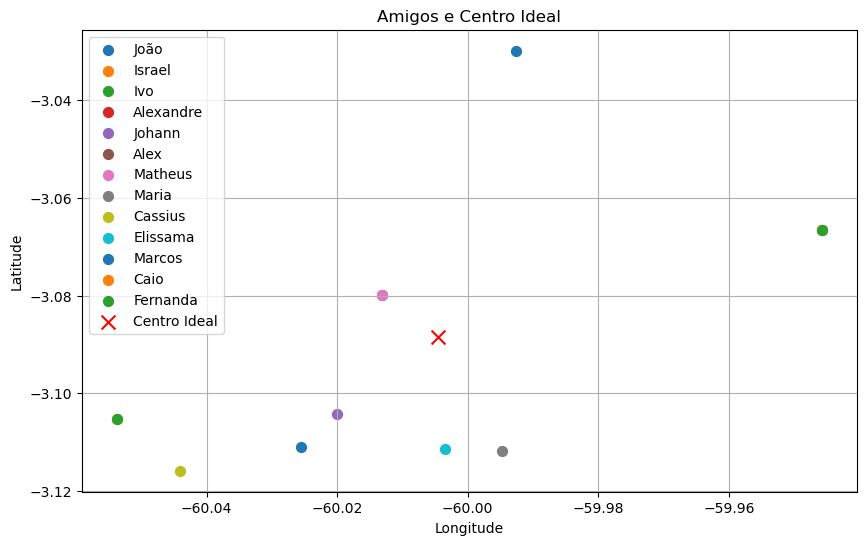

In [5]:
# Tamanho do Gráfico
plt.figure(figsize=(10, 6))

# Adicionando os amigos
for _, row in dados.iterrows():
    plt.scatter(row['Longitude'], row['Latitude'], label=row['Nome'], s=50)

# Adicionando o centro ideal
plt.scatter(centro_ideal[1], centro_ideal[0], color='red', label='Centro Ideal', s=100, marker='x')

plt.title("Amigos e Centro Ideal")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid()
plt.show()


## Visualização em Mapa

In [6]:
# Centralizando o mapa no centro ideal
mapa = folium.Map(location=centro_ideal, zoom_start=12)

# Adicionando os amigos ao mapa
for _, row in dados.iterrows():
    folium.Marker(
        location=(row['Latitude'], row['Longitude']),
        popup=row['Nome'],
        icon=folium.Icon(color='blue')
    ).add_to(mapa)

# Adicionando o centro ideal ao mapa
folium.Marker(
    location=centro_ideal,
    popup='Centro Ideal',
    icon=folium.Icon(color='red')
).add_to(mapa)

# Mostrar o mapa
mapa